### Universidad de Monterrey   
----

Juan Roberto Sánchez Pardo   
Ingenieria en Roótica y Sistemas Inteligentes (IRSI)   
Profesor: Andrés Hernández Gutiérrez   
Monterrey Nuevo León, 23 Agosto 2024


[Introducción](#introduccion)   
[Importación de librerías](#importacion-de-librerias)   
[Diseño del modelo](#disenio-del-modelo)
Take me to [pookie](#pookie)


### Introduction

When programming in Python, it is recommended to import any required libraries at the beginninig of the Jupyter Notebook or Python script. The following code cells imports the following Python libraries:

+ ```numpy```: Used to create vectors and perform methematical operations.
+ ```tensorflow```: It is used to design, train, validate and test the development of a single-neuron neural network.
+ ``` matplotlib```: It is used for visualisation purposes, e.g., plot the learning curves to evaluate the training process.
+ ```sklearn.model_selection```: This library provides the ```train_test_split``` method to split the initial data set into the training and validation sets.


### <a name="importacion-de-librerias"></a> Importación de librerías


kjskjdjlkasjdlksajdlkasjdlkasjdjalkdsa

In [1]:
# Import standard libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2024-08-24 08:15:26.460868: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-24 08:15:26.465872: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-24 08:15:26.642669: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-24 08:15:27.304318: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-24 08:15:32.485335: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

lakdjaslkdjalkjdlkasjdlkajdajdjalkdjlksad

In [2]:
def generate_data(true_coeffs=np.array([10, 1]), noise_std=2, num_samples=100):

    # Seed for reproducibility
    np.random.seed(4500)

    # Generate synthetic data
    x = np.arange(0,100, 1)
    y = true_coeffs[0] + true_coeffs[1]*x + np.random.normal(loc=0.0, scale=noise_std, size=num_samples)

    # Return features and response
    return (x, y)

lkJSkdjsalkdjlksajdlkasjdlkasjdlkajsdlkajda

In [3]:
# Generate a synthetic dataset for simple linear regression
true_coeffs = np.array([10, 1])
noise_std = 5
x, y = generate_data(true_coeffs=true_coeffs, noise_std=noise_std, num_samples=100)

asdadasda

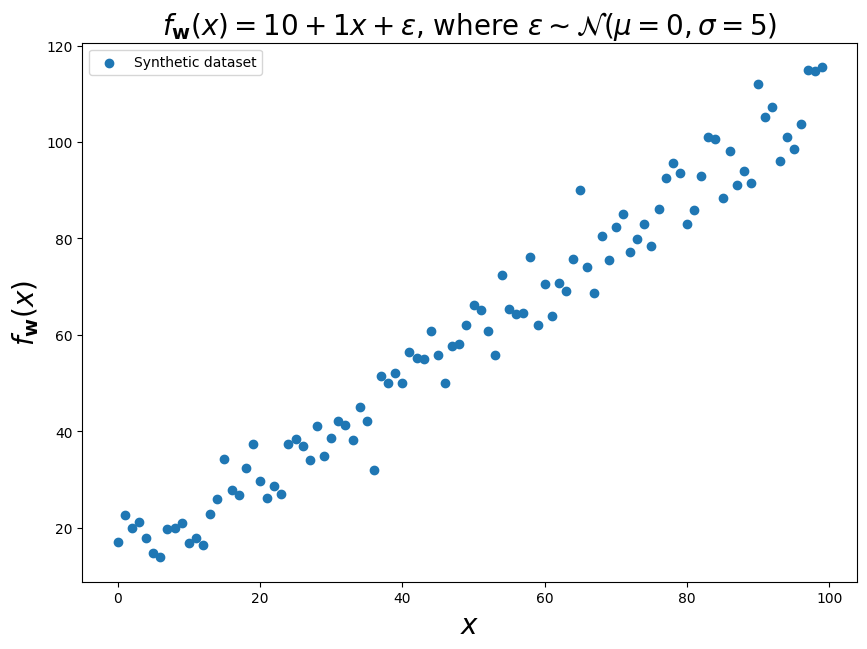

In [4]:
# Visualise the generated synthetica dataset
plt.figure(figsize=(10,7))
plt.scatter(x, y, label='Synthetic dataset')
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$",
          fontsize=20)
plt.legend()
plt.show()

In [11]:
# Split the data into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

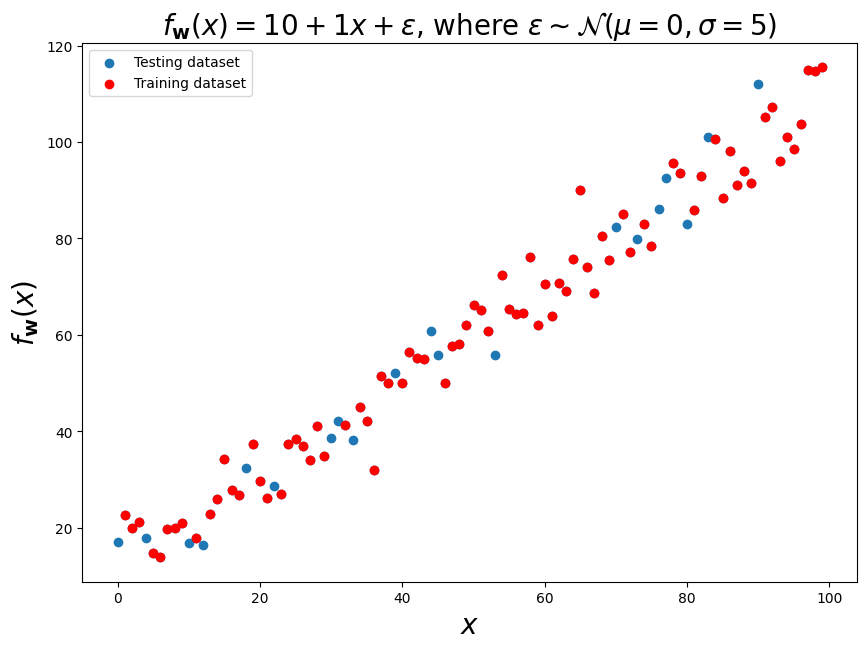

In [12]:
# Visualise the generated synthetica dataset
plt.figure(figsize=(10,7))
plt.scatter(x, y, label='Testing dataset')
plt.scatter(x_train, y_train, label='Training dataset', color=[1,0,0])
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$",
          fontsize=20)
plt.legend()
plt.show()

### <a name="disenio-del-modelo" /> Diseño del modelo

### <a name="pookie"></a>This is the Heading

In [13]:
# Build the linear regression model using a multiple-input single neuron
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train the model
model.fit(x_train, y_train, epochs=200, batch_size=10, validation_split=0.10, verbose=1)

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f'\nTest Loss: {loss}')


Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 2190.3298 - val_loss: 2731.3613
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2042.4257 - val_loss: 2695.7224
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1792.9175 - val_loss: 2662.2378
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1833.7338 - val_loss: 2629.2222
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2037.8370 - val_loss: 2595.9197
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1830.6696 - val_loss: 2564.5679
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2114.1709 - val_loss: 2531.8064
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1776.0659 - val_loss: 2500.8713
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1890.7119 - val_loss: 2470.3301
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1756.0479 - val_loss: 2440.1956
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1711.5010 - val_loss: 2406.6831
Epoch 12

In [22]:
# Print the weights of the trained model
weights = model.layers[0].get_weights()
print(f"Weights [w1]: {weights[0]}")
print(f"Biases [w0]: {weights[1]}")

Weights [w1]: [[1.0129665]]
Biases [w0]: [1.7462391]


In [23]:
# Make predictions
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [24]:
# Make predictions
y_pred_train = model.predict(x_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 


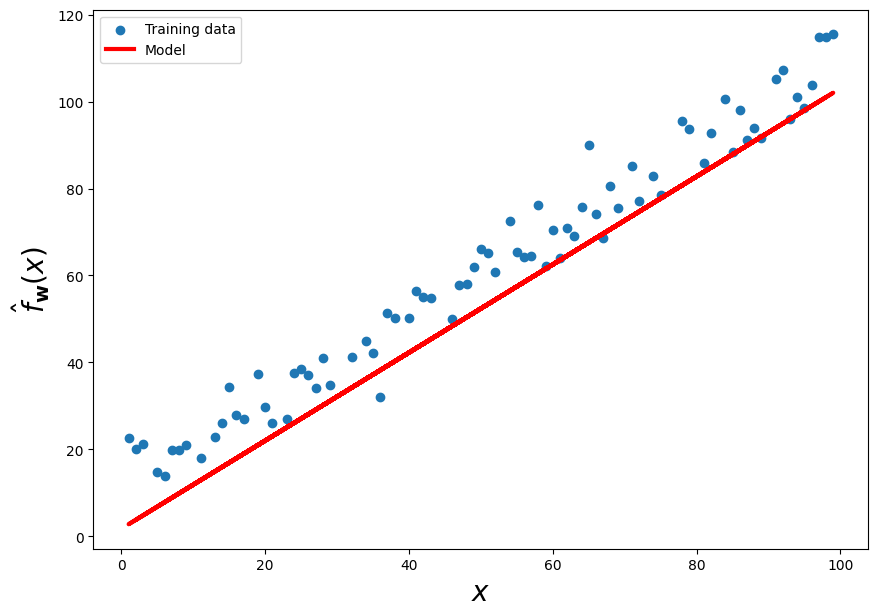

In [25]:
# Plot the results
plt.figure(figsize=(10, 7))

plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_train, y_pred_train, label='Model', linewidth=3, color=[1,0,0])
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel("$\hat{f}_{\mathbf{w}}(x)$", fontsize=20)

plt.legend();